### Analyzing Nativity

One way to measure immigration with ACS data is to analyze [B05012: Nativity in the United States](https://censusreporter.org/data/table/?table=B05012&geo_ids=97000US3612510&primary_geo_id=97000US3612510).

The first year 5-year estimate is from 2009 and the last year is from 2023. You are not supposed to compare overlapping 5-year periods. So I will choose the first year, the last year and midpoint (2016). Note that when the 2024 estimates are available it would make more sense to choose 2009, 2014, 2019 and 2024.

...   Total  Native  Foreign-born  Year
0  44953   31623         13330  2009
0  45310   30885         14425  2016
0  47891   32414         15477  2023


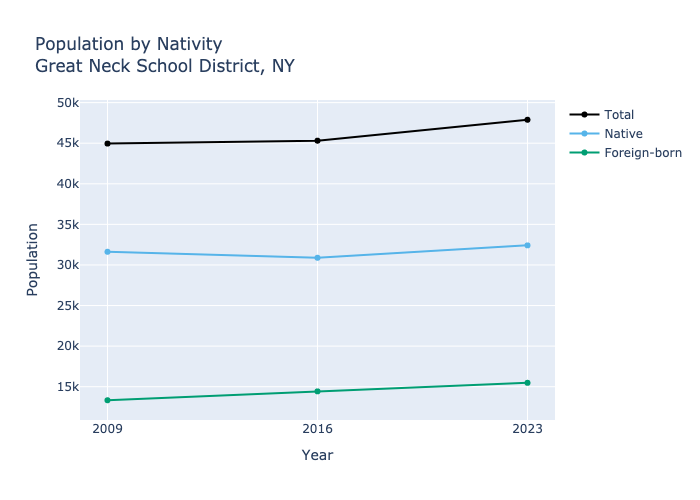

In [7]:
from censusdis.datasets import ACS5
from censusdis.states import NY

from utils import download_multiyear, graph_multiyear, pct_change_multiyear

df = download_multiyear(
    dataset=ACS5,
    vintages=[2009, 2016, 2023],
    group="B05012",
    prompt=False,
    state=NY,
    school_district_unified="12510",
)
print(df)
graph_multiyear(
    df=df,
    title="Population by Nativity<br>Great Neck School District, NY",
    yaxis_title="Population",
)

What most stands out to me about this graph is that there is a noticable uptick in the total population between 2016 and 2023. It is hard to get a feel for how big the changes in the subcategories is because the Y-axis encompasses the total as well as the sub-categories. One way to address this is to convert the raw numbers to percent change.

   Total  Native  Foreign-born  Year
0    NaN     NaN           NaN  2009
0    0.8    -2.3           8.2  2016
0    5.7     5.0           7.3  2023


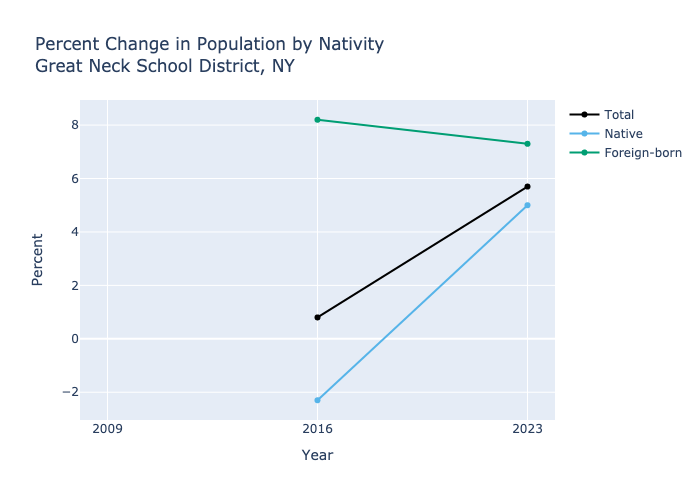

In [8]:
df_pct_change = pct_change_multiyear(df)

print(df_pct_change)

graph_multiyear(
    df_pct_change,
    "Percent Change in Population by Nativity<br>Great Neck School District, NY",
    "Percent",
)

2009 is blank because it is the first year in the 5-year ACS and so there is nothing to compare it to with respect to percent change. From this graph it is clear that the Foreign-born population increased faster than the Native population in both 2016 and 2023. Additionally, the native population actually decreased between 2009 and 2016, despite the total population increasing!

### Percent Foreign-Born

Here is how we can graph the percentage of the population that was Foreign-Born in each of the last 3 reporting periods.

   Total  Native  Foreign-born  Year  Percent Foreign-born
0  44953   31623         13330  2009                  29.7
0  45310   30885         14425  2016                  31.8
0  47891   32414         15477  2023                  32.3


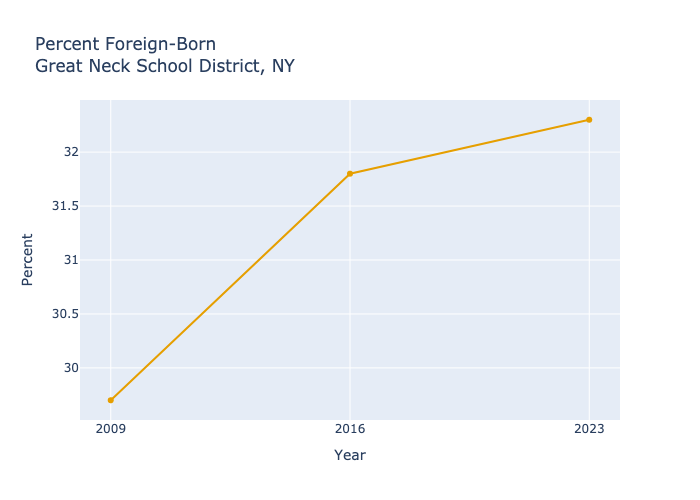

In [9]:
df_percent_foreign = df.copy()
df_percent_foreign["Percent Foreign-born"] = (
    df["Foreign-born"] / df["Total"] * 100
).round(1)

print(df_percent_foreign)
graph_multiyear(
    df_percent_foreign,
    "Percent Foreign-Born<br>Great Neck School District, NY",
    "Percent",
    ["Percent Foreign-born"],
)

So the Percent Foreign-Born in Great Neck Union Free School District has increased steadily since at least 2009. It started at 30% and increased to 32%.